# # Постановка задачи

Итак суть задачи состоит в том, чтобы с помощью методов машинного обучения построить модель, которая прогнозировала бы спасется человек или нет. К задаче прилагаются 2 файла:
train.csv — набор данных на основании которого будет строиться модель (обучающая выборка)
test.csv — набор данных для проверки модели

Как было написано выше, для анализ понадобятся модули Pandas и scikit-learn. С помощью Pandas мы проведем начальный анализ данных, а sklearn поможет в вычислении прогнозной модели. Итак, для начала загрузим нужные модули:
Кроме того даются пояснения по некоторым полям:
PassengerId — идентификатор пассажира
Survival — поле в котором указано спасся человек (1) или нет (0)
Pclass — содержит социально-экономический статус:
высокий
средний
низкий
Name — имя пассажира
Sex — пол пассажира
Age — возраст
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
Ticket — номер билета
Fare — цена билета
Cabin — каюта
Embarked — порт посадки
C — Cherbourg
Q — Queenstown
S — Southampton

## Анализ входных данных

In [2]:
from pandas import read_csv, DataFrame, Series
data = read_csv('basics_data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Populating the interactive namespace from numpy and matplotlib


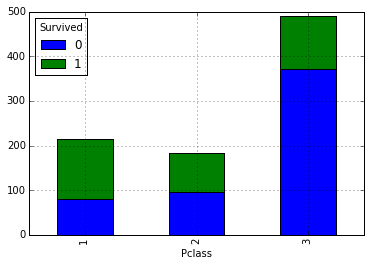

In [4]:
#lets try to build some pivot table.
#Our assumption: who get more money - will have more chances
%pylab inline
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

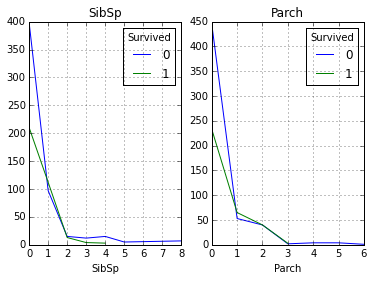

In [5]:
#how about the assumption that people with a lot of family have less chances?
fig, axes = plt.subplots(ncols = 2)
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

In [6]:
#try to find number of useful entries. All available entries = 890
data.PassengerId[data.Cabin.notnull()].count()

204

In [7]:
data.PassengerId[data.Age.notnull()].count()

714

In [8]:
#try to use Age variable to prediction. But lets try to fill gaps with medians!
#data.describe()
#data.Age = data.Age.median()
data.Age[data.Age.isnull()] = data.Age.median()
data.Age

/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0     22
1     38
2     26
3     35
4     35
5     28
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
...
876    20
877    19
878    28
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: float64

In [9]:
data.Age.median()

28.0

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [12]:
#lets fill gaps with two most relevant ports
MaxPassEmbarked = data.groupby('Embarked').count()['PassengerId']
data.Embarked[data.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
#lets drop variables thats do not contain valuable info
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [14]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
5,0,3,male,28,0,0,8.4583,Q
6,0,1,male,54,0,0,51.8625,S
7,0,3,male,2,3,1,21.0750,S
8,1,3,female,27,0,2,11.1333,S
9,1,2,female,14,1,0,30.0708,C


In [15]:
#now we have TIDY data
#and its time to run some preprocessing

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.Sex.drop_duplicates()) #задаем список значений для кодирования
dicts['Sex'] = list(label.classes_)
data.Sex = label.transform(data.Sex) #заменяем значения из списка кодами закодированных элементов 

label.fit(data.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
data.Embarked = label.transform(data.Embarked)

In [16]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2


In [18]:
#preprocessing win (by the way its a really weak preprocessing)

#lets set up test file in the view like a train file

test = read_csv('basics_data/test.csv')
test.Age[test.Age.isnull()] = test.Age.mean()
test.Fare[test.Fare.isnull()] = test.Fare.median() #заполняем пустые значения средней ценой билета
MaxPassEmbarked = test.groupby('Embarked').count()['PassengerId']
test.Embarked[test.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
result = DataFrame(test.PassengerId)
test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

label.fit(dicts['Sex'])
test.Sex = label.transform(test.Sex)

label.fit(dicts['Embarked'])
test.Embarked = label.transform(test.Embarked)

/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [20]:
target = data.Survived
train = data.drop(['Survived'], axis=1) #из исходных данных убираем Id пассажира и флаг спасся он или нет
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [21]:
model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [22]:
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = cross_validation.train_test_split(train, target, test_size=0.25)

In [23]:
model_rfc.fit(train, target)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [24]:
result.insert(1,'Survived', model_rfc.predict(test))
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
